파이썬 머신러닝 완벽가이드 ch4. 1~2

pg. 181(199)~210(228)

---
#**04. 분류**

04-01. 분류의 개요

04-02. 결정트리
- 결정 트리의 구조
- 결정 트리의 작동원리
- 결정 트리 모델의 특징
- 결정 트리 파라미터
- 결정 트리 모델의 시각화
- 결정 트리 과적합(Overfitting)
- 결정 트리 실습 - 사용자 행동 인식 데이터 세트
---

###**04-01. 분류의 개요**

- 지도학습: 레이블(Label)이라는 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 분류(Classification): 지도학습의 유형. 기존 데이터가 어떤 레이블에 속하는지 패턴을 머신러닝 알고리즘으로 인지(학습 및 모델 생성)한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별(예측)하는 것.
- 앙상블 방법(Ensemble Method): 분류와 같은 정형 데이터 예측 분석 영역에서 매우 높은 예측 성능으로 각광받고 있는 알고리즘 방법 중 하나. 매우 많은 여러 개의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해서 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하여 예측 성능을 향상시킴.  
   - 배깅(Bagging): 랜덤 포레스트(Random Forest)
   - 부스팅(Boosting): 그레디언트 부스팅(Gradient Boosting), XgBoost(eXtra Gradient Boost), LightBGM
- 결정 트리(Decision Tree): 앙상블의 기본 알고리즘으로, ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘.

###**04-02. 결정 트리**

**결정트리의 구조**

결정 트리는 데이터에 있는 규칙을 학습을 통해서 자동으로 찾아내어 트리(Tree)기반의 분류 규칙을 만드는 것. 다른 말로, 룰 기반의 프로그램에 적용되는 if, else를 자동으로 찾아내서 예측을 위한 규칙을 만드는 알고리즘. 아래는 결정 트리의 간략한 구조.




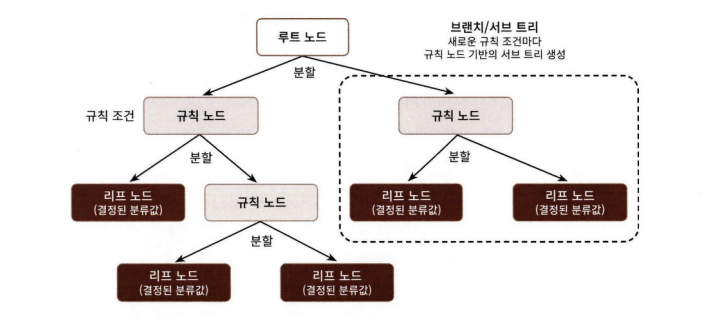

- 규칙 노드(Decision Node): 다른말로 브랜치(branch) 노드. 자식 노드가 있는 노드로, 자식 노드를 만들기 위한 분할 규칙 조건을 가짐.
- 리프 노드(Leaf Node): 최종 클래스(레이블)값이 결정되는 노드. 제일 말단의 노드.
- 서브 트리(Sub Tree): 새로운 규칙조건마다 생성됨.

**결정 트리의 작동원리**

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야하기 때문에, 이를 위해서 결정 노드는 **균일한 데이터 세트를 먼저 선택할 수 있도록** 규칙 조건을 만듦. 여기로 균일하다는 것은 혼잡도가 낮은 것을 의미. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측함.

*정보의 균일도를 측정하는 방법
- 정보 이득(Information Gain) 지수: 엔트로피 기반의 개념. 정보 이득 지수는 1-엔트로피 지수값. 즉, 정보 이득이 높으면 균일도가 높은 것.
- 지니 계수: 경제학의 불평등 지수를 나타내는 계수. 0으로 갈수록 평등(균일), 1로 갈수록 불평등. 결정 트리에선 지니계수를 기반으로 데이터 세트를 분할함.

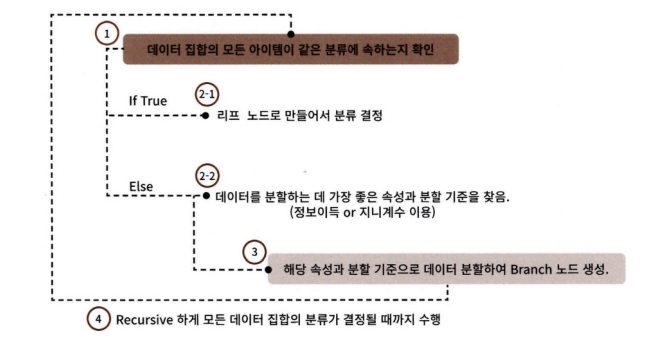

**결정 트리 모델의 특징**
- 장점: '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임. 또한, 정보의 균일도만 신경쓰면 되므로 피처의 스케일링과 정규화 같은 전처리 작업이 필요없음.
- 단점: 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 조건을 계속 추가하면서 트리 깊이가 계속 커지고, 복잡한 학습 모델에 이르면서 과적합으로 테스트 데이터 세트(실제 상황)에 대한 예측 성능이 떨어질 수 밖에 없음.

**결정 트리 파라미터**

과적합으로 인한 알고리즘 성능 저하를 해결하기 위해 규칙 생성 로직을 미리 제어하기 위한 파라미터들이 있음. 아래의 파라미터들은 DecisionTreeClassifier, DecisionTreeRegressor 둘다 동일하게 적용됨.
- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수. 디폴트는 2.
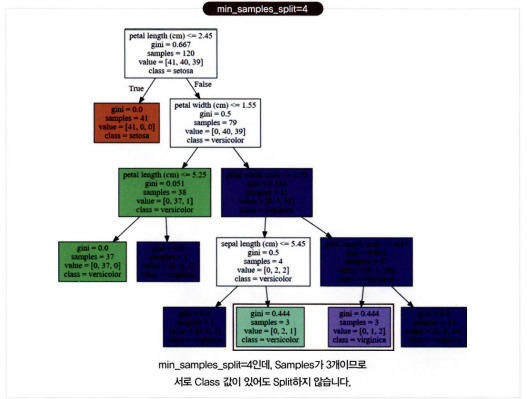
- min_samples_leaf: 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야할 최소한의 샘플 수. 단, 비대칭적 데이터의 경우 주의가 필요.
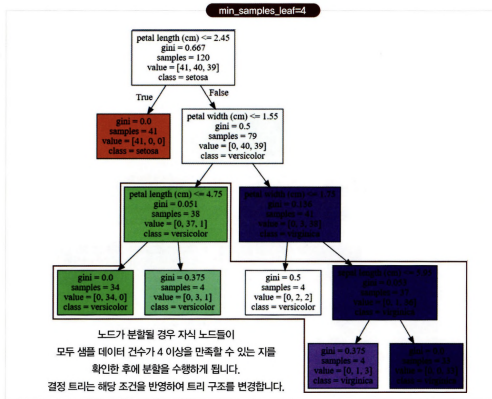
- max_features: 최적의 분할을 위해 고려할 최대 피처 수. 디폴트는 None(전체 피처 선정).
- max_depth: 트리의 최대 깊이 규정. 디폴트는 None(클래스 결정값이 완벽해질 때까지 깊이를 키우며 계속 분할).
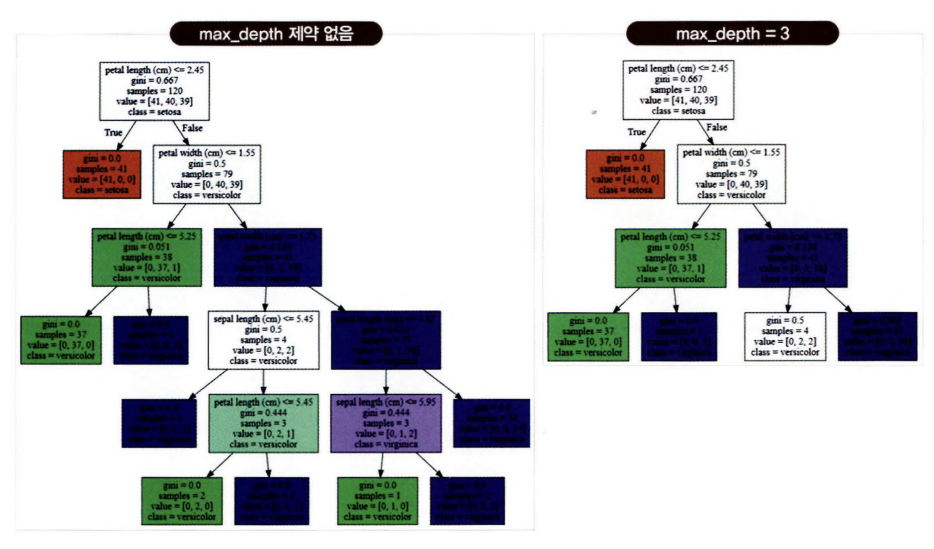
- max_leaf_nodes: 말단 노드(leaf)의 최대 개수

**결정 트리 모델의 시각화**
- #**export_graphviz( )** 이용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

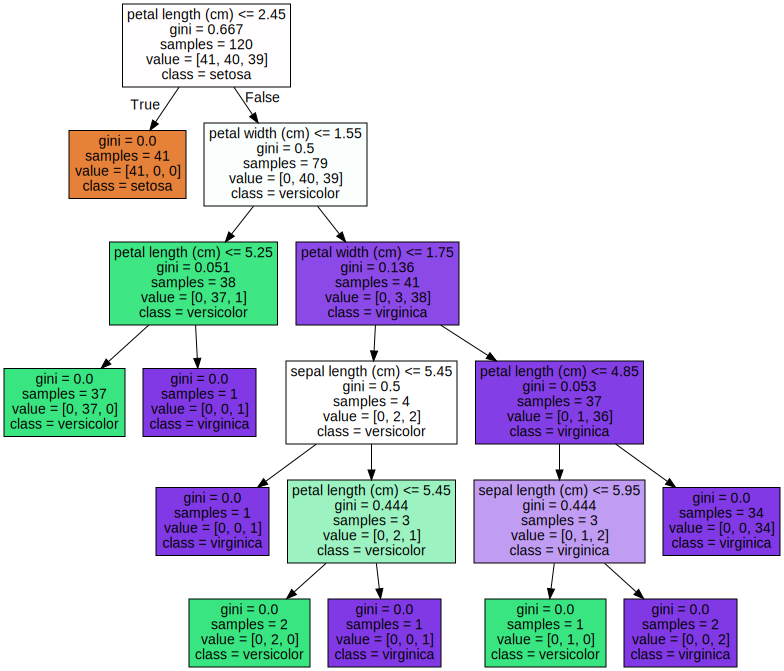

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 팡리을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- 1번 노드 지표 설명:
   - samples = 120개는 전체 데이터가 120개라는 의미
   - value = [41, 40, 39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
   - sample 120개가 value = [41, 40, 39] 분포도로 되어 있으므로 지니 계수는 0.667
   -  petal length (cm)〈= 2.45 규칙으로 자식 노드 생성
   - class = setosa는 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미

- 모든 노드는 규칙을 가진 브랜치 노드 또는 자식 노드가 없는 리프 노드 중 하나.
- 각 노드의 색깔은 데이터의 레이블 값을 의미. 주황색은 0： Setosa, 초록색은 1： Versicolor, 보라색은 2： Virginica 레이블을 의미. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미.

**# feature_importances_**
- dt_clf 객체의 속성
- 규칙 트리를 만드는데에 기여하는 피처들의 중요도를 ndarray형태로 반환하여 피처 순서대로 값이 할당됨. 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미.

   

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

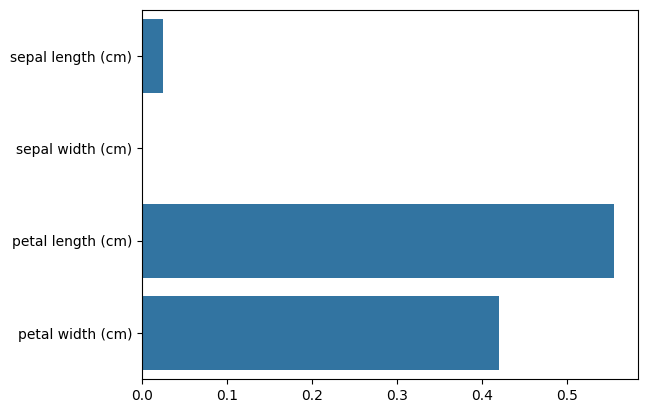

In [ ]:
# 붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서의 중요도 추출

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

**결정트리 과적합 (Overfitting)**

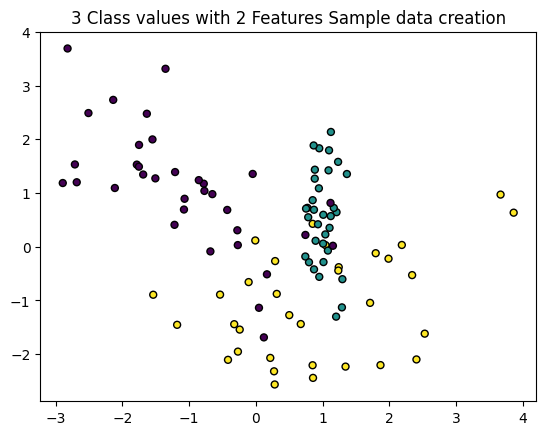

In [ ]:
# make_classification API를 이용해서 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 임의로 생성.

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
# visualize_boundary()함수 생성

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

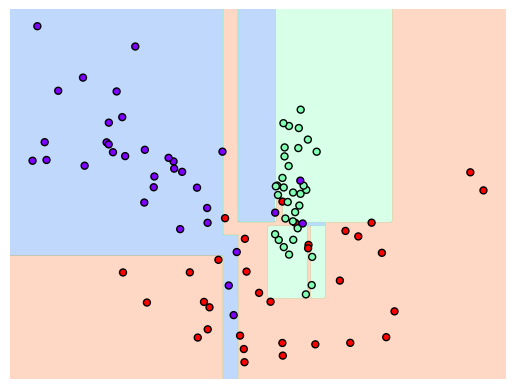

In [ ]:
# 모델이 어떻게 데이터 세트를 예측분류하는지 시각적으로 표현.
# 하이퍼 파라미터는 디폴트.

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 균일 조건이 계속 적용되어 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐. min_samples_leaf 파라미터를 6으로 설정해 결정 기준 경계의 변화를 살펴보자.

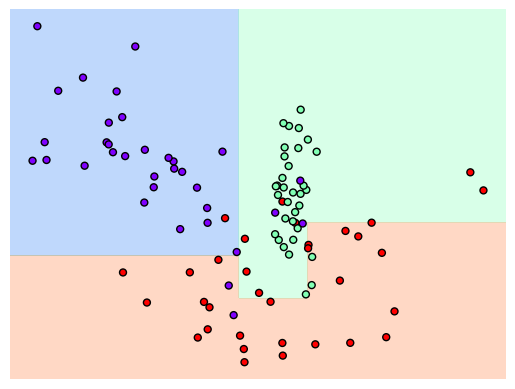

In [ ]:
# min_samples_leaf = 6으로 트리 생성 조선을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

좀 더 일반화된 분류 규칙에 따라 분류됨. 이 모델이 첫번째 모델보다 예측 성능이 더 뛰어날 확률이 높음. 복잡한 모델은 학습 데이터 세트와 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어기 때문.

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
# 중복된 피처명 알아보기
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
# 중복된 피처명에 대해서 원본 피처명에 _1, _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('/content/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()을 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환.
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-61-8769d57c14fc>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)


In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
# DecisionTreeClassifier 이용해서 동작 예측 분류 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
# GridSearchCV를 이용해서 5개의 CV 세트로 7개의 max_depth를 테스트. min_samples_split는 16으로 고정.

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# max_depth값에 따라서 예측성능이 어떻게 변했는지 GridSearchCV 객체의 cv_results_ 속성으로 알아보기

# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [ ]:
# 별도의 테스트 데이터세트에서 min_samples_split를 6으로 고정하고 max_depth의 변화에 따른 값 측정하기

max_depths = [6,8,10,12,16,20,24]
# max_depth값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [ ]:
# GridSearchCV 예제와 max_depth 8 이후로 정확도 감소. 이처럼 결정트리의 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터로 깊이를 제어할 수 있어야함.
# 이번엔 max_depth와 min_samples_split를 같이 변경하면서 정화고 성능 튜닝해보기.

params = {
    'max_depth': [8,12,16,20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# max_depth가 8, min_samples_split가 16일때 최고의 정확도 약 85.49%가 나타남.
# 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터 조합을 적용해보자.

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


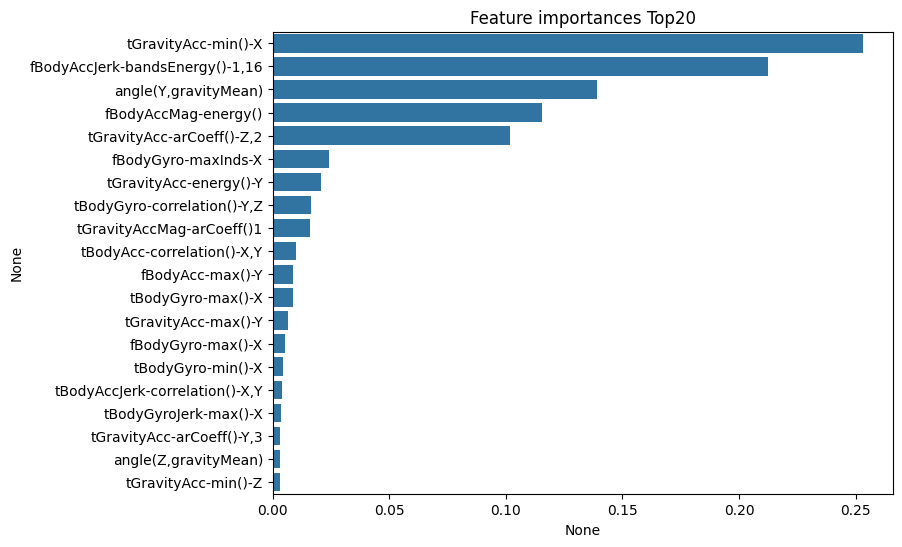

In [ ]:
# 마지막으로, feature_importances_ 속성을 이용하여 결정트리에서 중요도가 높은 순으로 top20 피처를 막대그래프로 알아보자.
# Top5의 피처들이 매우 중요하게 규칙생성에 영향을 미치고 있음을 알 수 있다.

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해서 Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()